# Setting up

In [64]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
%cd /content/drive/MyDrive/Projects/1. Churn Prediction/

/content/drive/MyDrive/Projects/1. Churn Prediction


# Importing dataset

In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [67]:
DATASET = "Trial 2: output_cleaned_dataset.csv"

In [68]:
df = pd.read_csv(DATASET)

In [69]:
df.shape

(6589, 41)

In [70]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,42.39,16.0,593.30,974.81,4498.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,10.69,10.0,542.40,610.28,31297.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,33.65,30.0,280.85,415.45,62069.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,27.82,4.0,1237.85,1599.51,46677.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,7.38,11.0,267.40,289.54,42853.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


# Cleaning dataset

## Splitting dataset into X and y

In [71]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [72]:
X.shape

(6589, 40)

In [73]:
y.shape

(6589,)

## Splitting dataset into train, test and val

In [74]:
# splitting into train (60%), test (20%) and val (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [75]:
X_train.shape

(4612, 40)

In [76]:
y_train.shape

(4612,)

In [77]:
X_test.shape

(988, 40)

In [78]:
y_test.shape

(988,)

In [79]:
X_val.shape

(989, 40)

In [80]:
y_val.shape

(989,)

# Training

## Building model

In [81]:
from xgboost.callback import EarlyStopping, TrainingCheckPoint

checkpointer = TrainingCheckPoint("/", "model_4")

In [82]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=1000, learning_rate=0.001, callbacks=[checkpointer])
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.TrainingCheckPoint object at 0x7f50009e86d0>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
y_pred = bst.predict(X_test)

In [84]:
y_test.shape

(988,)

In [85]:
y_pred.shape

(988,)

# Analysing

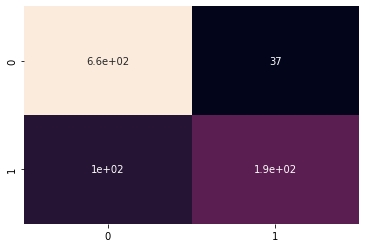

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cbar=False)
plt.show()

In [87]:
accuracy_score(y_test, y_pred)

0.861336032388664

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       702
         1.0       0.83      0.65      0.73       286

    accuracy                           0.86       988
   macro avg       0.85      0.80      0.82       988
weighted avg       0.86      0.86      0.86       988



In [89]:
stayed_precision = precision_score(y_test, y_pred, labels=[0, 1], pos_label=0)

In [90]:
churned_precision = precision_score(y_test, y_pred, labels=[0, 1], pos_label=1)

In [91]:
stayed_recall = recall_score(y_test, y_pred, labels=[0, 1], pos_label=0)

In [92]:
churned_recall = recall_score(y_test, y_pred, labels=[0, 1], pos_label=1)

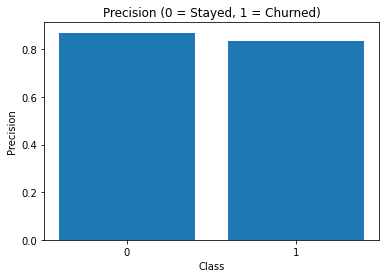

In [93]:
plt.bar(["0", "1"], [stayed_precision, churned_precision])
plt.xlabel("Class")
plt.ylabel("Precision")
plt.title("Precision (0 = Stayed, 1 = Churned)")
plt.show()

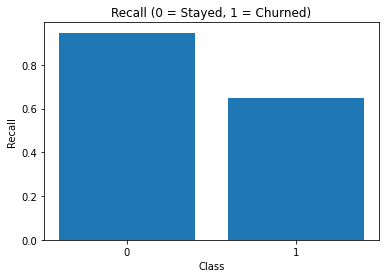

In [94]:
plt.bar(["0", "1"], [stayed_recall, churned_recall])
plt.xlabel("Class")
plt.ylabel("Recall")
plt.title("Recall (0 = Stayed, 1 = Churned)")
plt.show()